# TUGAS CLUSTERING DATASET HEALTH NEWS IN TWITTER

In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [26]:
df = pd.read_csv('foxnewshealth.txt', sep='|', names=['tweet id','date time','tweet'], encoding='cp1252')
df.head()

,tweet id,date time,tweet
0,585942799561928704,Wed Apr 08 23:10:24 +0000 2015,Injury prevention programs unpopular with high...
1,585934004089683969,Wed Apr 08 22:35:27 +0000 2015,6 dietary changes to make midlife http://ow.ly...
2,585926494054195201,Wed Apr 08 22:05:36 +0000 2015,Massachusetts governor gets head shaved to sup...
3,585921515922788354,Wed Apr 08 21:45:49 +0000 2015,Dad wins 3 marathons in 8 days; winnings to he...
4,585915150449934338,Wed Apr 08 21:20:32 +0000 2015,Possible cure for melanoma? http://ow.ly/LlLg8


# **Preprocessing**
1. Handling Missing Values<br>
2. Encode<br>
3. Handling Outliers<br>

## Check and Handling Missing Values

In [27]:
df.isnull().sum()

tweet id     0
date time    0
tweet        0
dtype: int64

Ketiga atribut tidak memiliki missing values.

## Encode Categorical to Numerical

In [28]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = df.columns.values.tolist()
for col in features:
    if df[col].dtype in numerics: continue
    categorical_columns.append(col)

# Encoding Fitur Categorical
for col in categorical_columns:
    if col in df.columns:
        enco = LabelEncoder()
        enco.fit(list(df[col].astype(str).values))
        df[col] = enco.transform(list(df[col].astype(str).values))

In [29]:
print(df.dtypes)

tweet id     int64
date time    int64
tweet        int64
dtype: object


##Check and Handling Outliers

In [30]:
print(round(df.describe()),2)

           tweet id  date time   tweet
count  2.000000e+03     2000.0  2000.0
mean   5.627664e+17     1000.0  1000.0
std    1.404550e+16      577.0   577.0
min    5.376303e+17        0.0     0.0
25%    5.521467e+17      500.0   500.0
50%    5.632394e+17     1000.0  1000.0
75%    5.753232e+17     1499.0  1499.0
max    5.859428e+17     1999.0  1999.0 2


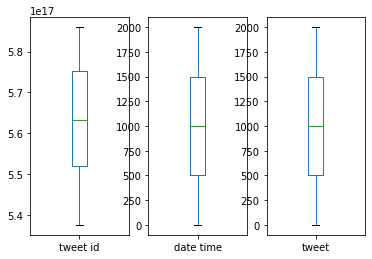

<Figure size 1440x720 with 0 Axes>

In [31]:
f,axes = plt.subplots(1,3)
plt.figure(figsize=(20,10))
df['tweet id'].plot(kind='box',ax=axes[0])
df['date time'].plot(kind='box',ax=axes[1])
df['tweet'].plot(kind='box',ax=axes[2])

plt.show()

Dari statistik, tidak terdapat outliers.

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

sdf = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [33]:
sdf.head()

,tweet id,date time,tweet
0,1.650506,1.043561,0.054560
1,1.649879,1.041829,-1.266995
2,1.649345,1.040097,0.293583
3,1.648990,1.038365,-0.726595
4,1.648537,1.036633,0.724863


# Clustering

In [34]:
kmeans = KMeans(3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [35]:
identified_clusters = kmeans.fit_predict(df)
identified_clusters

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

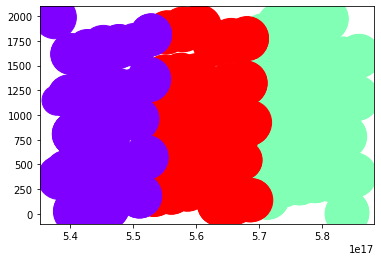

In [36]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['tweet id'],data_with_clusters['date time'],data_with_clusters['tweet'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [37]:
data_with_clusters

,tweet id,date time,tweet,Clusters
0,585942799561928704,1602,1031,1
1,585934004089683969,1601,268,1
2,585926494054195201,1600,1169,1
3,585921515922788354,1599,580,1
4,585915150449934338,1598,1418,1
...,...,...,...,...
1995,537650884990496768,1987,1511,0
1996,537645732715847680,1986,356,0
1997,537640703250411520,1985,1184,0
1998,537634458569285632,1984,139,0


Text(0, 0.5, 'WCSS')

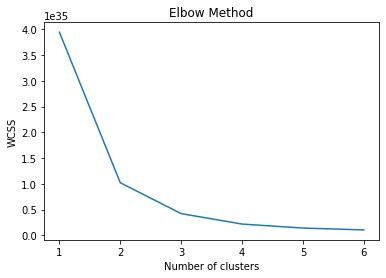

In [38]:
wcss=[]
for i in range(1,7):
  kmeans=KMeans(i)
  kmeans.fit(df)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')